Upload the basic notebook

In [1]:
%%capture
%run foundation_notebook.ipynb

In [2]:
print("Notebook run successfully!")

Notebook run successfully!


In [3]:
import matplotlib.cm as cm

# 10. Sensitivity lines - Part 2

## 10.1 Spin 0(L)

"Evolution" refers to how accuracy depends on $S$; for various $m$.

Upload the evolutions

In [124]:
import pickle

with open('store/files/autoencoder_experimental/evolution_spin0l_ABC_run2.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

evolution_s0l_A1 = loaded_data['evolution_s0l_A1']
evolution_s0l_A2 = loaded_data['evolution_s0l_A2']
evolution_s0l_B1 = loaded_data['evolution_s0l_B1']
evolution_s0l_B2 = loaded_data['evolution_s0l_B2']
evolution_s0l_C1 = loaded_data['evolution_s0l_C1']
evolution_s0l_C2 = loaded_data['evolution_s0l_C2']

Upload $S_{99}$s

In [126]:
import pandas as pd
df = pd.read_csv('store/files/autoencoder_experimental/S99_spin0l_ABC_run2.csv')

S_array_099_s0l_A1 = df['S_array_099_s0l_A1']
S_array_099_s0l_A2 = df['S_array_099_s0l_A2']
S_array_099_s0l_B1 = df['S_array_099_s0l_B1']
S_array_099_s0l_B2 = df['S_array_099_s0l_B2']
S_array_099_s0l_C1 = df['S_array_099_s0l_C1']
S_array_099_s0l_C2 = df['S_array_099_s0l_C2']

Plots of evolutions

C:\Users\Pavel\AppData\Local\Temp\ipykernel_16752\370512732.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


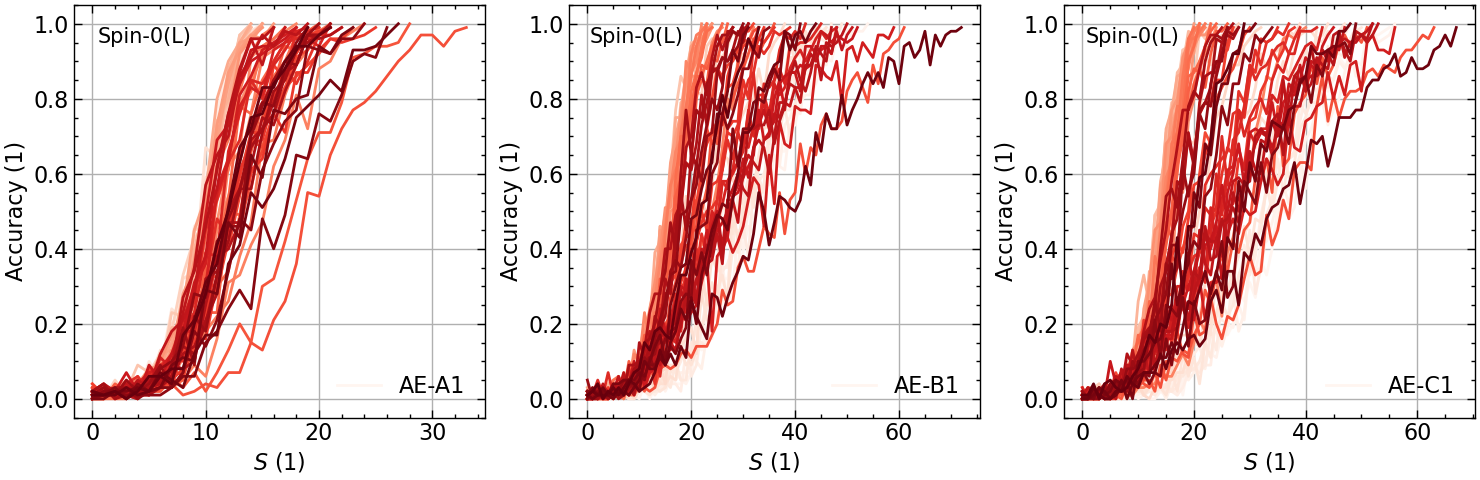

In [128]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # figsize adjusts overall figure size

# Create a colormap
cmap = cm.get_cmap('Reds')

# Plot the first figure
n_A1 = len(evolution_s0l_A1)
for i, eval in enumerate(evolution_s0l_A1):
    color = cmap(i / (n_A1 - 1))  # Normalize i to range [0, 1]
    label = "AE-A1" if i == 0 else None
    axs[0].plot(eval, "-", color=color, alpha=1, label=label)

# Plot the second  figure
n_B1 = len(evolution_s0l_B1)
for i, eval in enumerate(evolution_s0l_B1):
    color = cmap(i / (n_B1 - 1))  # Normalize i to range [0, 1]
    label = "AE-B1" if i == 0 else None
    axs[1].plot(eval, "-", color=color, alpha=1, label=label)

# Plot the third figure
n_C1 = len(evolution_s0l_C1)
for i, eval in enumerate(evolution_s0l_C1):
    color = cmap(i / (n_C1 - 1))  # Normalize i to range [0, 1]
    label = "AE-C1" if i == 0 else None
    axs[2].plot(eval, "-", color=color, alpha=1, label=label)

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].text(0.5, 0.95, "Spin-0(L)", fontsize=15, color="black")
axs[1].text(0.5, 0.95, "Spin-0(L)", fontsize=15, color="black")
axs[2].text(0.5, 0.95, "Spin-0(L)", fontsize=15, color="black")

axs[0].legend(loc = 'lower right')
axs[1].legend(loc = 'lower right')
axs[2].legend(loc = 'lower right')

axs[0].set_xlabel(r'$S$ (1)')
axs[0].set_ylabel('Accuracy (1)')
axs[1].set_xlabel(r'$S$ (1)')
axs[1].set_ylabel('Accuracy (1)')
axs[2].set_xlabel(r'$S$ (1)')
axs[2].set_ylabel('Accuracy (1)')

plt.tight_layout()
#plt.savefig("store/plots/autoencoder/Accuracy_vs_S_spin0L.png")
plt.show()

In [13]:
masses_eV = np.array(mass_list)

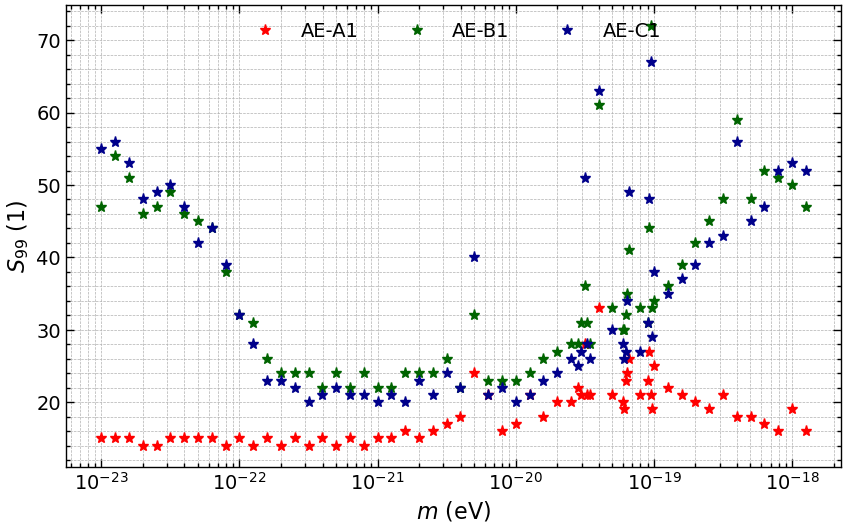

In [130]:
plt.figure(figsize=(10, 6))

plt.plot(masses_eV, S_array_099_s0l_A1, "*", ms = 8, color = "red", label = "AE-A1")
#plt.plot(masses_eV, S_array_099_s0l_A2, "o", ms = 8, color = "orange", label = "AE-A2")

plt.plot(masses_eV, S_array_099_s0l_B1, "*", ms = 8, color = "darkgreen", label = "AE-B1")
#plt.plot(masses_eV, S_array_099_s0l_B2, "o", ms = 8, color = "green", label = "AE-B2")

plt.plot(masses_eV, S_array_099_s0l_C1, "*", ms = 8, color = "darkblue", label = "AE-C1")
#plt.plot(masses_eV, S_array_099_s0l_C2, "o", ms = 8, color = "blue", label = "AE-C2    Spin-0(L)")

plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.xscale('log')

plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$S_{99}$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='upper center', fontsize=14, ncol = 3)

#plt.savefig("store/plots/autoencoder/S99_vs_m_ABC_autoencoder_spin0L.png")

plt.show()

How to get $\lambda_{99}$ from $S_{99}$ when fiducial parameters are specificied.

In [132]:
# compute the lambda value when mass, r, upsilon and SNR are given

def threshold_lambda_spin0l(m, r, upsasc, snr):

    m_val = m.to(u.eV).value
    omegb_ev_val =omega_b_ev.value
    k = m_val / omegb_ev_val
    psi =  np.array(psi_i(omega_b, Tasc, TOA_sim_array))

    q_vec = residuum_s0l(1, x, m, rhoDM, r, omega_b_ev, psi, upsasc)
    q_len = np.sqrt( np.dot(q_vec,q_vec) )

    lamb = snr * noise.to(u.s) / q_len.to(u.s)

    return lamb

In [134]:
# a choice of DM phase and amplitude
upsasc_ex, r_ex = np.pi/4, 1 / np.sqrt(2)

# here, S is such that accuracy is 99%

lamb_s0l_array_099_A1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s0l_A1):
    lamb = np.array(threshold_lambda_spin0l(m, r_ex, upsasc_ex, snr))
    lamb_s0l_array_099_A1.append(lamb)
lamb_s0l_array_099_A1 = np.array(lamb_s0l_array_099_A1)

lamb_s0l_array_099_B1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s0l_B1):
    lamb = np.array(threshold_lambda_spin0l(m, r_ex, upsasc_ex, snr))
    lamb_s0l_array_099_B1.append(lamb)
lamb_s0l_array_099_B1 = np.array(lamb_s0l_array_099_B1)

lamb_s0l_array_099_C1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s0l_C1):
    lamb = np.array(threshold_lambda_spin0l(m, r_ex, upsasc_ex, snr))
    lamb_s0l_array_099_C1.append(lamb)
lamb_s0l_array_099_C1 = np.array(lamb_s0l_array_099_C1)

lamb_s0l_array_099_A2 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s0l_A2):
    lamb = np.array(threshold_lambda_spin0l(m, r_ex, upsasc_ex, snr))
    lamb_s0l_array_099_A2.append(lamb)
lamb_s0l_array_099_A2 = np.array(lamb_s0l_array_099_A2)

lamb_s0l_array_099_B2 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s0l_B2):
    lamb = np.array(threshold_lambda_spin0l(m, r_ex, upsasc_ex, snr))
    lamb_s0l_array_099_B2.append(lamb)
lamb_s0l_array_099_B2 = np.array(lamb_s0l_array_099_B2)

lamb_s0l_array_099_C2 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s0l_C2):
    lamb = np.array(threshold_lambda_spin0l(m, r_ex, upsasc_ex, snr))
    lamb_s0l_array_099_C2.append(lamb)
lamb_s0l_array_099_C2 = np.array(lamb_s0l_array_099_C2)

Bayesian sensitivity line

In [136]:
# simple Bayesian lines for a few mass points (same points as for the autoencoder)
lamb_bayes_sensitivity_s0l = np.array([lambda_s0l(x, omega_b, m, rhoDM, r_ex, upsasc_ex) for m in  np.array(mass_list)*u.eV ])

Masses are not ordered, so we must reorder arrays, for plotting.

In [138]:
# REORDERING 
mass_array = np.array(mass_list)

# Get the sorted indices of the mass array
sorted_indices = np.argsort(mass_array)

# Sort mass_list and lamb_s0_array_095_X using the sorted indices
sorted_mass_list                  = mass_array[sorted_indices]
sorted_lamb_s0l_array_099_A1      = lamb_s0l_array_099_A1[sorted_indices]
sorted_lamb_s0l_array_099_B1      = lamb_s0l_array_099_B1[sorted_indices]
sorted_lamb_s0l_array_099_C1      = lamb_s0l_array_099_C1[sorted_indices]

sorted_lamb_s0l_array_099_A2      = lamb_s0l_array_099_A2[sorted_indices]
sorted_lamb_s0l_array_099_B2      = lamb_s0l_array_099_B2[sorted_indices]
sorted_lamb_s0l_array_099_C2      = lamb_s0l_array_099_C2[sorted_indices]

sorted_lamb_bayes_sensitivity_s0l = lamb_bayes_sensitivity_s0l[sorted_indices]

Sensitivity lines 

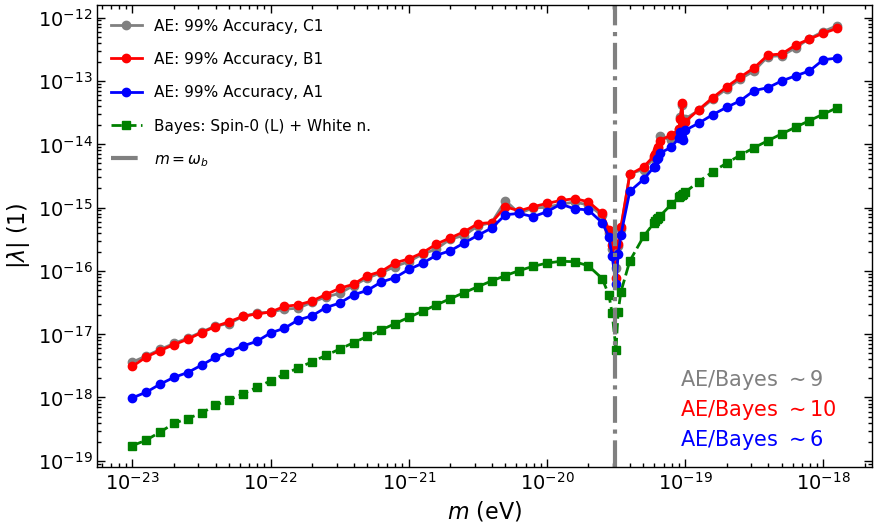

In [140]:
plt.figure(figsize=(10, 6))

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0l_array_099_C1, marker="o", linestyle='-', color='grey',  label="AE: 99% Accuracy, C1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0l_array_099_C2, marker="*", linestyle='-', color='black', label="AE: 99% Accuracy, C2")

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0l_array_099_B1, marker="o", linestyle='-',  color='red',     label="AE: 99% Accuracy, B1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0l_array_099_B2, marker="*", linestyle='--', color='darkred', label="AE: 99% Accuracy, B2", alpha = 0.5)

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0l_array_099_A1, marker="o", linestyle='-',  color='blue',     label="AE: 99% Accuracy, A1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0l_array_099_A2, marker="*", linestyle='--', color='darkblue', label="AE: 99% Accuracy, A2", alpha = 0.5)

# Plot simplistic Bayesian lines (spin 0, linear)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_bayes_sensitivity_s0l, marker="s", linestyle='--', color='green', label="Bayes: Spin-0 (L) + White n.")

# Add vertical line for angular orbital frequency
plt.axvline(x=omega_b_ev.value, color='grey', linestyle='-.', linewidth=3, label=r"$m = \omega_b$")

# Logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add gridlines for better readability on log scale
#plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set axis labels with clear descriptions
plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$|\lambda|$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

median_099_s0l_A1 =round(np.median(lamb_s0l_array_099_A1 / sorted_lamb_bayes_sensitivity_s0l))
median_099_s0l_B1 =round(np.median(lamb_s0l_array_099_B1 / sorted_lamb_bayes_sensitivity_s0l))
median_099_s0l_C1 =round(np.median(lamb_s0l_array_099_C1 / sorted_lamb_bayes_sensitivity_s0l))

#median_099_s0l_A2 =round(np.median(lamb_s0l_array_099_A2 / sorted_lamb_bayes_sensitivity_s0l))
#median_099_s0l_B2 =round(np.median(lamb_s0l_array_099_B2 / sorted_lamb_bayes_sensitivity_s0l))
#median_099_s0l_C2 =round(np.median(lamb_s0l_array_099_C2 / sorted_lamb_bayes_sensitivity_s0l))

plt.text(sorted_mass_list[-15], 9 * sorted_lamb_bayes_sensitivity_s0l[0], r"AE/Bayes $\sim$" + str(median_099_s0l_C1), fontsize=15, color="grey")
plt.text(sorted_mass_list[-15], 3 * sorted_lamb_bayes_sensitivity_s0l[0], r"AE/Bayes $\sim$" + str(median_099_s0l_B1), fontsize=15, color="red")
plt.text(sorted_mass_list[-15], sorted_lamb_bayes_sensitivity_s0l[0], r"AE/Bayes $\sim$" + str(median_099_s0l_A1), fontsize=15, color="blue") 

#plt.text(sorted_mass_list[-44], 9 * sorted_lamb_bayes_sensitivity_s0l[0], r"AE/Bayes $\sim$" + str(median_099_s0l_C2), fontsize=15, color="black")
#plt.text(sorted_mass_list[-44], 3 * sorted_lamb_bayes_sensitivity_s0l[0], r"AE/Bayes $\sim$" + str(median_099_s0l_B2), fontsize=15, color="darkred")
#plt.text(sorted_mass_list[-44], sorted_lamb_bayes_sensitivity_s0l[0], r"AE/Bayes $\sim$" + str(median_099_s0l_A2), fontsize=15, color="darkblue")

# Customize the legend for better clarity
plt.legend(loc='upper left', fontsize=11, ncol = 1, labelspacing=1.2)

#plt.savefig("store/plots/autoencoder/sensitivity_spin0L.png")

plt.show()

What changes when $S_{5}$

In [142]:
# Find S_5
S_005_s0l_A1 = []

for evol in evolution_s0l_A1:
    helpful_array = np.array(evol)
    mask = helpful_array>=0.05
    s_corresponding = sum(~mask)
    S_005_s0l_A1.append(s_corresponding)

# Find lambda_5
lamb_s0l_array_005_A1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_005_s0l_A1):
    lamb = np.array(threshold_lambda_spin0l(m, r_ex, upsasc_ex, snr))
    lamb_s0l_array_005_A1.append(lamb)
lamb_s0l_array_005_A1 = np.array(lamb_s0l_array_005_A1)

sorted_lamb_s0l_array_005_A1 = lamb_s0l_array_005_A1[sorted_indices]

median_005_s0l_A1 = round( np.median( sorted_lamb_s0l_array_005_A1 / sorted_lamb_bayes_sensitivity_s0l ) )
median_005_s0l_A1

2

What changes when $S_{50}$

In [144]:
S_05_s0l_A1 = []

for evol in evolution_s0l_A1:
    helpful_array = np.array(evol)
    mask = helpful_array>=0.5
    s_corresponding = sum(~mask)
    S_05_s0l_A1.append(s_corresponding)

lamb_s0l_array_05_A1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_05_s0l_A1):
    lamb = np.array(threshold_lambda_spin0l(m, r_ex, upsasc_ex, snr))
    lamb_s0l_array_05_A1.append(lamb)
lamb_s0l_array_05_A1 = np.array(lamb_s0l_array_05_A1)

sorted_lamb_s0l_array_05_A1 = lamb_s0l_array_05_A1[sorted_indices]

median_05_s0l_A1 = round( np.median( sorted_lamb_s0l_array_05_A1 / sorted_lamb_bayes_sensitivity_s0l ) )
median_05_s0l_A1

4

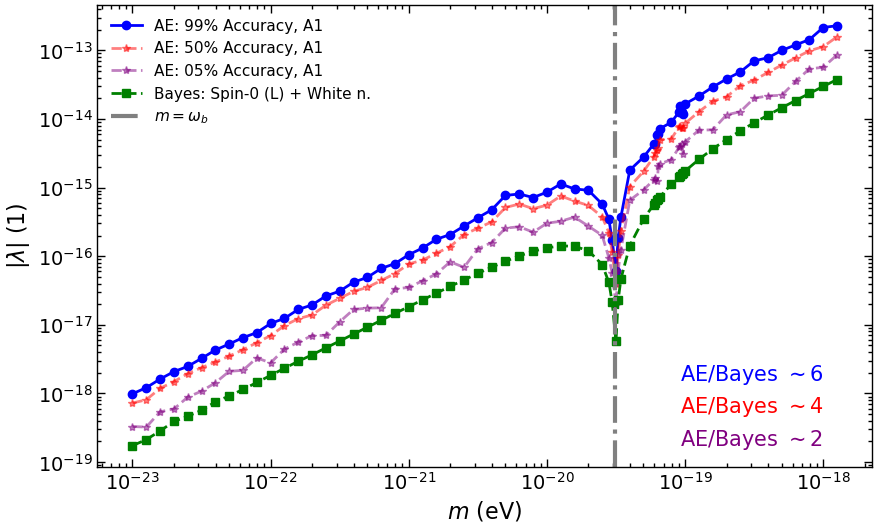

In [146]:
plt.figure(figsize=(10, 6))

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0l_array_099_A1, marker="o", linestyle='-', color='blue', label="AE: 99% Accuracy, A1")
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0l_array_05_A1, marker="*", linestyle='--', color='red', label="AE: 50% Accuracy, A1", alpha = 0.5)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0l_array_005_A1, marker="*", linestyle='--', color='purple', label="AE: 05% Accuracy, A1", alpha = 0.5)

# Plot simplistic Bayesian lines (spin 0, linear)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_bayes_sensitivity_s0l, marker="s", linestyle='--', color='green', label="Bayes: Spin-0 (L) + White n.")

# Add vertical line for angular orbital frequency
plt.axvline(x=omega_b_ev.value, color='grey', linestyle='-.', linewidth=3, label=r"$m = \omega_b$")

# Logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add gridlines for better readability on log scale
#plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set axis labels with clear descriptions
plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$|\lambda|$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Customize the legend for better clarity
plt.legend(loc='upper left', fontsize=11)

plt.text(sorted_mass_list[-15], 9 * sorted_lamb_bayes_sensitivity_s0l[0], r"AE/Bayes $\sim$" + str(median_099_s0l_A1), fontsize=15, color="blue")
plt.text(sorted_mass_list[-15], 3 * sorted_lamb_bayes_sensitivity_s0l[0], r"AE/Bayes $\sim$" + str(median_05_s0l_A1), fontsize=15, color="red")
plt.text(sorted_mass_list[-15], sorted_lamb_bayes_sensitivity_s0l[0], r"AE/Bayes $\sim$" + str(median_005_s0l_A1), fontsize=15, color="purple") 

#plt.savefig("store/plots/autoencoder/sensitivity_spin0L_Svarious.png")

plt.show()

## 10.2 Spin 0(Q)

In [148]:
import pickle

with open('store/files/autoencoder_experimental/evolution_spin0q_ABC_run2.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

evolution_s0q_A1 = loaded_data['evolution_s0q_A1']
evolution_s0q_B1 = loaded_data['evolution_s0q_B1']
evolution_s0q_C1 = loaded_data['evolution_s0q_C1']

In [150]:
import pandas as pd
df = pd.read_csv('store/files/autoencoder_experimental/S99_spin0q_ABC_run2.csv')

S_array_099_s0q_A1 = df['S_array_099_s0q_A1']
S_array_099_s0q_B1 = df['S_array_099_s0q_B1']
S_array_099_s0q_C1 = df['S_array_099_s0q_C1']

C:\Users\Pavel\AppData\Local\Temp\ipykernel_16752\1588888734.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


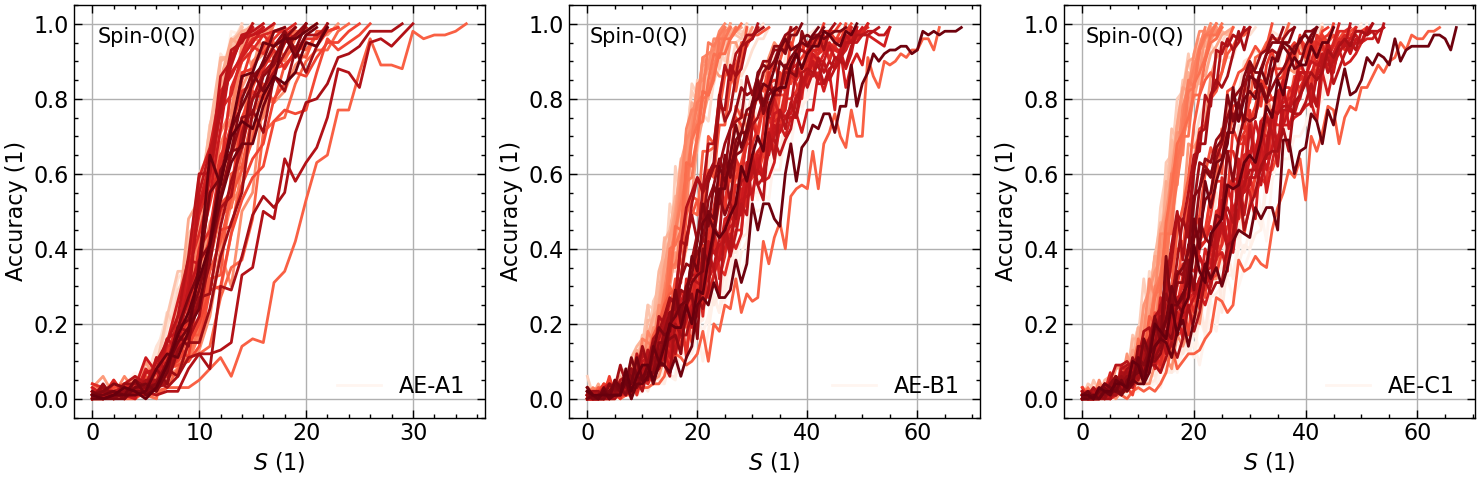

In [152]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # figsize adjusts overall figure size

# Create a colormap
cmap = cm.get_cmap('Reds')

# Plot the first figure
n_A1 = len(evolution_s0q_A1)
for i, eval in enumerate(evolution_s0q_A1):
    color = cmap(i / (n_A1 - 1))  # Normalize i to range [0, 1]
    label = "AE-A1" if i == 0 else None
    axs[0].plot(eval, "-", color=color, alpha=1, label=label)

# Plot the second  figure
n_B1 = len(evolution_s0q_B1)
for i, eval in enumerate(evolution_s0q_B1):
    color = cmap(i / (n_B1 - 1))  # Normalize i to range [0, 1]
    label = "AE-B1" if i == 0 else None
    axs[1].plot(eval, "-", color=color, alpha=1, label=label)

# Plot the third figure
for i, eval in enumerate(evolution_s0q_C1):
    color = cmap(i / (n_C1 - 1))  # Normalize i to range [0, 1]
    label = "AE-C1" if i == 0 else None
    axs[2].plot(eval, "-", color=color, alpha=1, label=label)

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].text(0.5, 0.95, "Spin-0(Q)", fontsize=15, color="black")
axs[1].text(0.5, 0.95, "Spin-0(Q)", fontsize=15, color="black")
axs[2].text(0.5, 0.95, "Spin-0(Q)", fontsize=15, color="black")

axs[0].legend(loc = 'lower right')
axs[1].legend(loc = 'lower right')
axs[2].legend(loc = 'lower right')

axs[0].set_xlabel(r'$S$ (1)')
axs[0].set_ylabel('Accuracy (1)')
axs[1].set_xlabel(r'$S$ (1)')
axs[1].set_ylabel('Accuracy (1)')
axs[2].set_xlabel(r'$S$ (1)')
axs[2].set_ylabel('Accuracy (1)')

plt.tight_layout()
#plt.savefig("store/plots/autoencoder/Accuracy_vs_S_spin0Q.png")
plt.show()

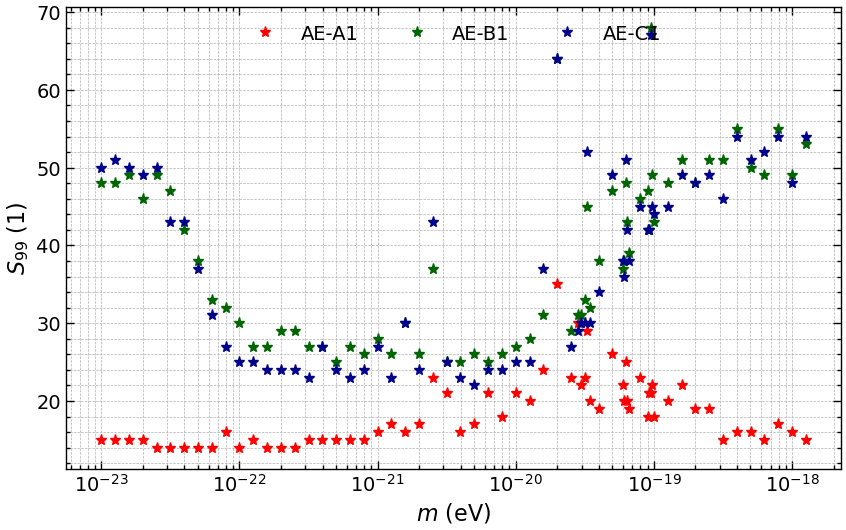

In [154]:
plt.figure(figsize=(10, 6))

plt.plot(masses_eV, S_array_099_s0q_A1, "*", ms = 8, color = "red", label = "AE-A1")
#plt.plot(masses_eV, S_array_099_s0q_A2, "o", ms = 8, color = "orange", label = "AE-A2")

plt.plot(masses_eV, S_array_099_s0q_B1, "*", ms = 8, color = "darkgreen", label = "AE-B1")
#plt.plot(masses_eV, S_array_099_s0q_B2, "o", ms = 8, color = "green", label = "AE-B2")

plt.plot(masses_eV, S_array_099_s0q_C1, "*", ms = 8, color = "darkblue", label = "AE-C1")
#plt.plot(masses_eV, S_array_099_s0q_C2, "o", ms = 8, color = "blue", label = "AE-C2    Spin-0(Q)")

plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.xscale('log')

plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$S_{99}$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='upper center', fontsize=14, ncol = 3)
#plt.savefig("store/plots/autoencoder/S99_vs_m_ABC_autoencoder_spin0Q.png")

plt.show()

In [156]:
# compute the lambda value when mass, r, upsilon and SNR are given

def threshold_lambda_spin0q(m, r, upsasc, snr):

    m_val = m.to(u.eV).value
    omegb_ev_val =omega_b_ev.value
    k = m_val / omegb_ev_val
    psi =  np.array(psi_i(omega_b, Tasc, TOA_sim_array))

    q_vec = residuum_s0q(1, x, m, rhoDM, r, omega_b_ev, psi, upsasc)
    q_len = np.sqrt( np.dot(q_vec,q_vec) )

    lamb = snr * noise.to(u.s) / q_len.to(u.s)

    return lamb

In [158]:
# a choice of DM phase and amplitude
upsasc_ex, r_ex = np.pi/4, 1 / np.sqrt(2)

# here, S is such that accuracy is 99%

lamb_s0q_array_099_A1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s0q_A1):
    lamb = np.array(threshold_lambda_spin0q(m, r_ex, upsasc_ex, snr))
    lamb_s0q_array_099_A1.append(lamb)
lamb_s0q_array_099_A1 = np.array(lamb_s0q_array_099_A1)

lamb_s0q_array_099_B1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s0q_B1):
    lamb = np.array(threshold_lambda_spin0q(m, r_ex, upsasc_ex, snr))
    lamb_s0q_array_099_B1.append(lamb)
lamb_s0q_array_099_B1 = np.array(lamb_s0q_array_099_B1)

lamb_s0q_array_099_C1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s0q_C1):
    lamb = np.array(threshold_lambda_spin0q(m, r_ex, upsasc_ex, snr))
    lamb_s0q_array_099_C1.append(lamb)
lamb_s0q_array_099_C1 = np.array(lamb_s0q_array_099_C1)

In [56]:
# simple Bayesian lines for a few mass points (same points as for the autoencoder)
lamb_bayes_sensitivity_s0q = np.array([lambda_s0q(x, omega_b, m, rhoDM, r_ex, upsasc_ex) for m in  np.array(mass_list)*u.eV ])

In [160]:
# REORDERING 
mass_array = np.array(mass_list)

# Get the sorted indices of the mass array
sorted_indices = np.argsort(mass_array)

# Sort mass_list and lamb_s0q_array_095_X using the sorted indices
sorted_mass_list                  = mass_array[sorted_indices]
sorted_lamb_s0q_array_099_A1      = lamb_s0q_array_099_A1[sorted_indices]
sorted_lamb_s0q_array_099_B1      = lamb_s0q_array_099_B1[sorted_indices]
sorted_lamb_s0q_array_099_C1      = lamb_s0q_array_099_C1[sorted_indices]

sorted_lamb_bayes_sensitivity_s0q = lamb_bayes_sensitivity_s0q[sorted_indices]

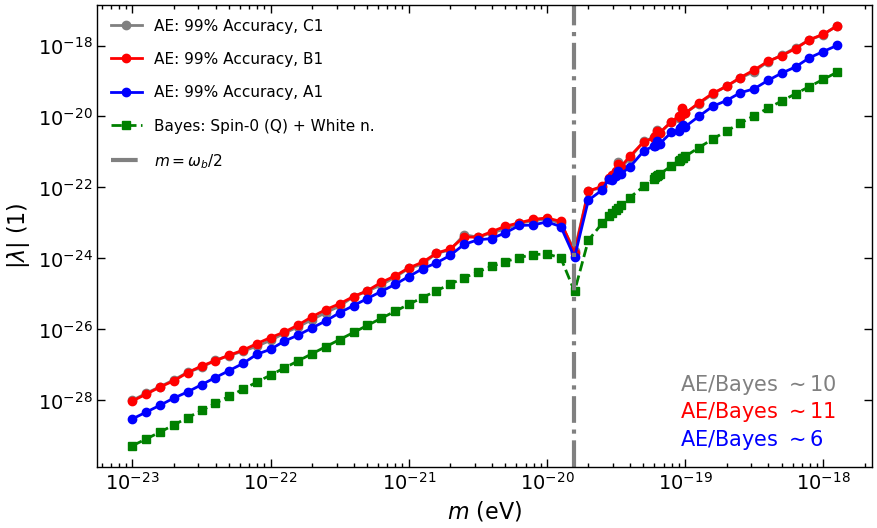

In [162]:
plt.figure(figsize=(10, 6))

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0q_array_099_C1, marker="o", linestyle='-', color='grey',  label="AE: 99% Accuracy, C1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0q_array_099_C2, marker="*", linestyle='-', color='black', label="AE: 99% Accuracy, C2")

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0q_array_099_B1, marker="o", linestyle='-',  color='red',     label="AE: 99% Accuracy, B1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0q_array_099_B2, marker="*", linestyle='--', color='darkred', label="AE: 99% Accuracy, B2", alpha = 0.5)

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0q_array_099_A1, marker="o", linestyle='-',  color='blue',     label="AE: 99% Accuracy, A1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0q_array_099_A2, marker="*", linestyle='--', color='darkblue', label="AE: 99% Accuracy, A2", alpha = 0.5)

# Plot simplistic Bayesian lines (spin 0, linear)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_bayes_sensitivity_s0q, marker="s", linestyle='--', color='green', label="Bayes: Spin-0 (Q) + White n.")

# Add vertical line for angular orbital frequency
plt.axvline(x=0.5*omega_b_ev.value, color='grey', linestyle='-.', linewidth=3, label=r"$m = \omega_b / 2$")

# Logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add gridlines for better readability on log scale
#plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set axis labels with clear descriptions
plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$|\lambda|$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

median_099_s0q_A1 =round(np.median(lamb_s0q_array_099_A1 / sorted_lamb_bayes_sensitivity_s0q))
median_099_s0q_B1 =round(np.median(lamb_s0q_array_099_B1 / sorted_lamb_bayes_sensitivity_s0q))
median_099_s0q_C1 =round(np.median(lamb_s0q_array_099_C1 / sorted_lamb_bayes_sensitivity_s0q))

#median_099_s0q_A2 =round(np.median(lamb_s0q_array_099_A2 / sorted_lamb_bayes_sensitivity_s0q))
#median_099_s0q_B2 =round(np.median(lamb_s0q_array_099_B2 / sorted_lamb_bayes_sensitivity_s0q))
#median_099_s0q_C2 =round(np.median(lamb_s0q_array_099_C2 / sorted_lamb_bayes_sensitivity_s0q))

plt.text(sorted_mass_list[-15], 36 * sorted_lamb_bayes_sensitivity_s0q[0], r"AE/Bayes $\sim$" + str(median_099_s0q_C1), fontsize=15, color="grey")
plt.text(sorted_mass_list[-15], 6 * sorted_lamb_bayes_sensitivity_s0q[0], r"AE/Bayes $\sim$" + str(median_099_s0q_B1), fontsize=15, color="red")
plt.text(sorted_mass_list[-15], sorted_lamb_bayes_sensitivity_s0q[0], r"AE/Bayes $\sim$" + str(median_099_s0q_A1), fontsize=15, color="blue") 

#plt.text(sorted_mass_list[-44], 36 * sorted_lamb_bayes_sensitivity_s0q[0], r"AE/Bayes $\sim$" + str(median_099_s0q_C2), fontsize=15, color="black")
#plt.text(sorted_mass_list[-44], 6 * sorted_lamb_bayes_sensitivity_s0q[0], r"AE/Bayes $\sim$" + str(median_099_s0q_B2), fontsize=15, color="darkred")
#plt.text(sorted_mass_list[-44], sorted_lamb_bayes_sensitivity_s0q[0], r"AE/Bayes $\sim$" + str(median_099_s0q_A2), fontsize=15, color="darkblue")

# Customize the legend for better clarity
plt.legend(loc='upper left', fontsize=11, ncol = 1, labelspacing=1.2)

#plt.savefig("store/plots/autoencoder/sensitivity_spin0Q.png")

plt.show()

In [164]:
# Find S_5
S_005_s0q_A1 = []

for evol in evolution_s0q_A1:
    helpful_array = np.array(evol)
    mask = helpful_array>=0.05
    s_corresponding = sum(~mask)
    S_005_s0q_A1.append(s_corresponding)

# Find lambda_5
lamb_s0q_array_005_A1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_005_s0q_A1):
    lamb = np.array(threshold_lambda_spin0q(m, r_ex, upsasc_ex, snr))
    lamb_s0q_array_005_A1.append(lamb)
lamb_s0q_array_005_A1 = np.array(lamb_s0q_array_005_A1)

sorted_lamb_s0q_array_005_A1 = lamb_s0q_array_005_A1[sorted_indices]

median_005_s0q_A1 = round( np.median( sorted_lamb_s0q_array_005_A1 / sorted_lamb_bayes_sensitivity_s0q ) )
median_005_s0q_A1

2

In [166]:
# Find S_5
S_05_s0q_A1 = []

for evol in evolution_s0q_A1:
    helpful_array = np.array(evol)
    mask = helpful_array>=0.5
    s_corresponding = sum(~mask)
    S_05_s0q_A1.append(s_corresponding)

lamb_s0q_array_05_A1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_05_s0q_A1):
    lamb = np.array(threshold_lambda_spin0q(m, r_ex, upsasc_ex, snr))
    lamb_s0q_array_05_A1.append(lamb)
lamb_s0q_array_05_A1 = np.array(lamb_s0q_array_05_A1)

sorted_lamb_s0q_array_05_A1 = lamb_s0q_array_05_A1[sorted_indices]

median_05_s0q_A1 = round( np.median( sorted_lamb_s0q_array_05_A1 / sorted_lamb_bayes_sensitivity_s0q ) )
median_05_s0q_A1

4

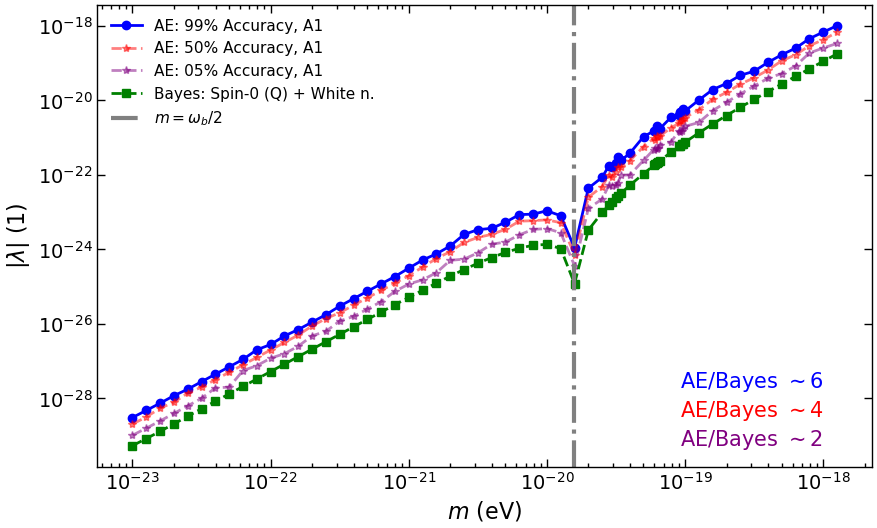

In [168]:
plt.figure(figsize=(10, 6))

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0q_array_099_A1, marker="o", linestyle='-', color='blue', label="AE: 99% Accuracy, A1")
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0q_array_05_A1, marker="*", linestyle='--', color='red', label="AE: 50% Accuracy, A1", alpha = 0.5)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s0q_array_005_A1, marker="*", linestyle='--', color='purple', label="AE: 05% Accuracy, A1", alpha = 0.5)

# Plot simplistic Bayesian lines (spin 0, linear)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_bayes_sensitivity_s0q, marker="s", linestyle='--', color='green', label="Bayes: Spin-0 (Q) + White n.")

# Add vertical line for angular orbital frequency
plt.axvline(x = 0.5 * omega_b_ev.value, color='grey', linestyle='-.', linewidth=3, label=r"$m = \omega_b / 2$")

# Logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add gridlines for better readability on log scale
#plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set axis labels with clear descriptions
plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$|\lambda|$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Customize the legend for better clarity
plt.legend(loc='upper left', fontsize=11)

plt.text(sorted_mass_list[-15], 36 * sorted_lamb_bayes_sensitivity_s0q[0], r"AE/Bayes $\sim$" + str(median_099_s0q_A1), fontsize=15, color="blue")
plt.text(sorted_mass_list[-15], 6 * sorted_lamb_bayes_sensitivity_s0q[0], r"AE/Bayes $\sim$" + str(median_05_s0q_A1), fontsize=15, color="red")
plt.text(sorted_mass_list[-15], sorted_lamb_bayes_sensitivity_s0q[0], r"AE/Bayes $\sim$" + str(median_005_s0q_A1), fontsize=15, color="purple") 

#plt.savefig("store/plots/autoencoder/sensitivity_spin0Q_Svarious.png")

plt.show()

## 10.3 Spin 1

In [192]:
import pickle

with open('store/files/autoencoder_experimental/evolution_spin1_ABC_run2.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

evolution_s1_A1 = loaded_data['evolution_s1_A1']
evolution_s1_B1 = loaded_data['evolution_s1_B1']
evolution_s1_C1 = loaded_data['evolution_s1_C1']

In [194]:
import pandas as pd
df = pd.read_csv('store/files/autoencoder_experimental/S99_spin1_ABC_run2.csv')

S_array_099_s1_A1 = df['S_array_099_s1_A1']
S_array_099_s1_B1 = df['S_array_099_s1_B1']
S_array_099_s1_C1 = df['S_array_099_s1_C1']

C:\Users\Pavel\AppData\Local\Temp\ipykernel_16752\112705351.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


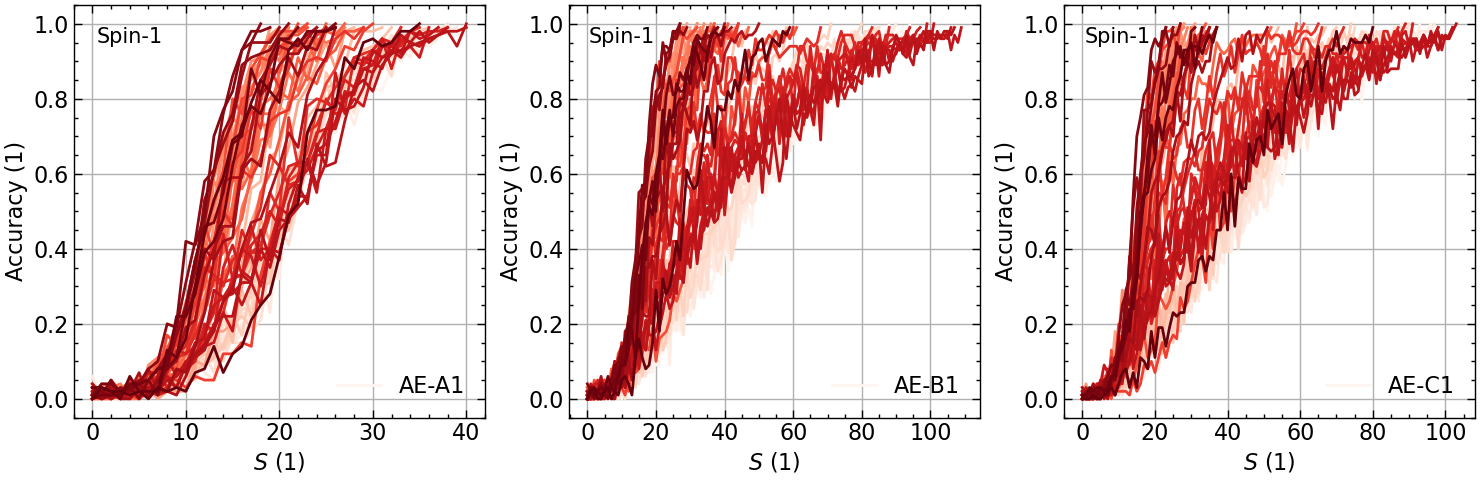

In [196]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # figsize adjusts overall figure size

# Create a colormap
cmap = cm.get_cmap('Reds')

# Plot the first figure
n_A1 = len(evolution_s1_A1)
for i, eval in enumerate(evolution_s1_A1):
    color = cmap(i / (n_A1 - 1))  # Normalize i to range [0, 1]
    label = "AE-A1" if i == 0 else None
    axs[0].plot(eval, "-", color=color, alpha=1, label=label)

# Plot the second figure
n_B1 = len(evolution_s1_B1)
for i, eval in enumerate(evolution_s1_B1):
    color = cmap(i / (n_B1 - 1))  # Normalize i to range [0, 1]
    label = "AE-B1" if i == 0 else None
    axs[1].plot(eval, "-", color=color, alpha=1, label=label)

# Plot the third figure
n_C1 = len(evolution_s1_C1)
for i, eval in enumerate(evolution_s1_C1):
    color = cmap(i / (n_C1 - 1))  # Normalize i to range [0, 1]
    label = "AE-C1" if i == 0 else None
    axs[2].plot(eval, "-", color=color, alpha=1, label=label)

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].text(0.5, 0.95, "Spin-1", fontsize=15, color="black")
axs[1].text(0.5, 0.95, "Spin-1", fontsize=15, color="black")
axs[2].text(0.5, 0.95, "Spin-1", fontsize=15, color="black")

axs[0].legend(loc = 'lower right')
axs[1].legend(loc = 'lower right')
axs[2].legend(loc = 'lower right')

axs[0].set_xlabel(r'$S$ (1)')
axs[0].set_ylabel('Accuracy (1)')
axs[1].set_xlabel(r'$S$ (1)')
axs[1].set_ylabel('Accuracy (1)')
axs[2].set_xlabel(r'$S$ (1)')
axs[2].set_ylabel('Accuracy (1)')

plt.tight_layout()
#plt.savefig("store/plots/autoencoder/Accuracy_vs_S_spin1.png")
plt.show()

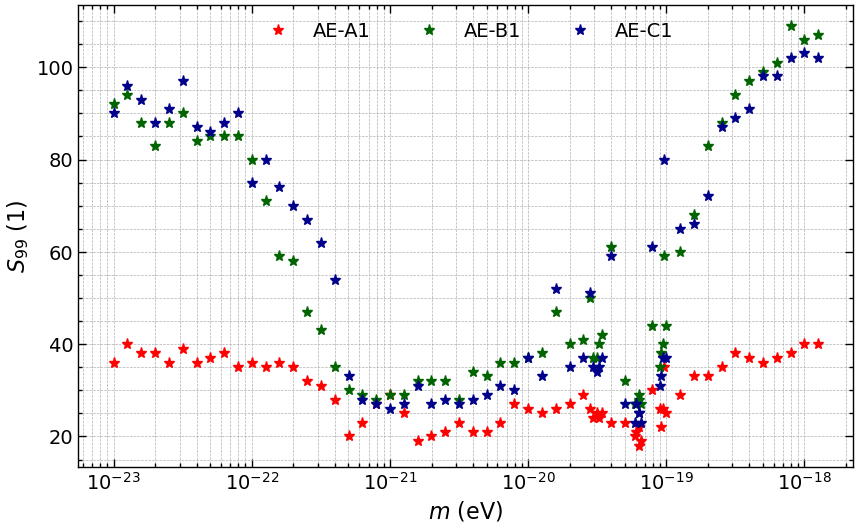

In [200]:
plt.figure(figsize=(10, 6))

plt.plot(masses_eV, S_array_099_s1_A1, "*", ms = 8, color = "red", label = "AE-A1")
#plt.plot(masses_eV, S_array_099_s1_A2, "o", ms = 8, color = "orange", label = "AE-A2")

plt.plot(masses_eV, S_array_099_s1_B1, "*", ms = 8, color = "darkgreen", label = "AE-B1")
#plt.plot(masses_eV, S_array_099_s1_B2, "o", ms = 8, color = "green", label = "AE-B2")

plt.plot(masses_eV, S_array_099_s1_C1, "*", ms = 8, color = "darkblue", label = "AE-C1")
#plt.plot(masses_eV, S_array_099_s1_C2, "o", ms = 8, color = "blue", label = "AE-C2    Spin-1")

plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.xscale('log')

plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$S_{99}$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='upper center', fontsize=14, ncol = 3)

#plt.savefig("store/plots/autoencoder/S99_vs_m_ABC_autoencoder_spin1.png")

plt.show()

In [202]:
# compute the lambda value when mass, r, upsilon and SNR are given

def threshold_lambda_spin1(m, r, upsilon, theta, phi, snr):

    m_val = m.to(u.eV).value
    omegb_ev_val =omega_b_ev.value
    k = m_val / omegb_ev_val
    psi =  np.array(psi_i(omega_b, Tasc, TOA_sim_array))

    q_vec = residuum_s1(1, x, m, r, omega_b_ev, psi, upsilon, theta, phi)
    q_len = np.sqrt( np.dot(q_vec,q_vec) )

    lamb = snr * noise.to(u.s) / q_len.to(u.s)

    return lamb

In [204]:
# a choice of DM phase and amplitude
upsasc_ex, theta_ex, phi_ex, r_ex = np.pi/3, np.pi/3, np.pi/3, 1 / np.sqrt(2)

# here, S is such that accuracy is 99%
lamb_s1_array_099_A1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s1_A1):
    lamb = np.array(threshold_lambda_spin1(m, r_ex, upsasc_ex, theta_ex, phi_ex, snr))
    lamb_s1_array_099_A1.append(lamb)
lamb_s1_array_099_A1 = np.array(lamb_s1_array_099_A1)

lamb_s1_array_099_B1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s1_B1):
    lamb = np.array(threshold_lambda_spin1(m, r_ex, upsasc_ex, theta_ex, phi_ex, snr))
    lamb_s1_array_099_B1.append(lamb)
lamb_s1_array_099_B1 = np.array(lamb_s1_array_099_B1)

lamb_s1_array_099_C1 = []
for m, snr in zip( np.array(mass_list)*u.eV , S_array_099_s1_C1):
    lamb = np.array(threshold_lambda_spin1(m, r_ex, upsasc_ex, theta_ex, phi_ex, snr))
    lamb_s1_array_099_C1.append(lamb)
lamb_s1_array_099_C1 = np.array(lamb_s1_array_099_C1)

In [205]:
# simple Bayesian lines for a few mass points (same points as for the autoencoder)
lamb_bayes_sensitivity_s1 = np.array([lambda_s1(x, m, r_ex, omega_b_ev, upsasc_ex, theta_ex, phi_ex) for m in np.array(mass_list)*u.eV])

In [207]:
# REORDERING 
mass_array = np.array(mass_list)

# Get the sorted indices of the mass array
sorted_indices = np.argsort(mass_array)

# Sort mass_list and lamb_s1_array_099_X using the sorted indices
sorted_mass_list                  = mass_array[sorted_indices]
sorted_lamb_s1_array_099_A1      = lamb_s1_array_099_A1[sorted_indices]
sorted_lamb_s1_array_099_B1      = lamb_s1_array_099_B1[sorted_indices]
sorted_lamb_s1_array_099_C1      = lamb_s1_array_099_C1[sorted_indices]

sorted_lamb_bayes_sensitivity_s1 = lamb_bayes_sensitivity_s1[sorted_indices]

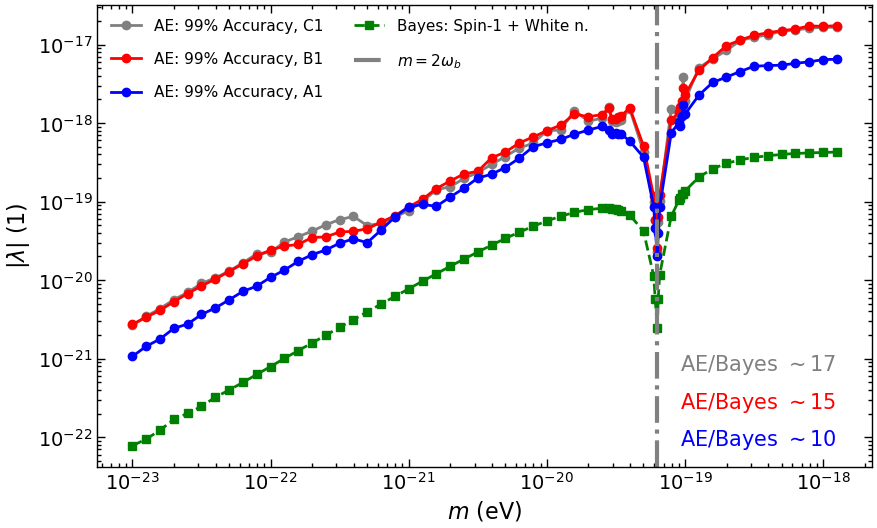

In [210]:
plt.figure(figsize=(10, 6))

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s1_array_099_C1, marker="o", linestyle='-', color='grey',  label="AE: 99% Accuracy, C1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s1_array_099_C2, marker="*", linestyle='-', color='black', label="AE: 99% Accuracy, C2")

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s1_array_099_B1, marker="o", linestyle='-',  color='red',     label="AE: 99% Accuracy, B1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s1_array_099_B2, marker="*", linestyle='--', color='darkred', label="AE: 99% Accuracy, B2", alpha = 0.5)

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s1_array_099_A1, marker="o", linestyle='-',  color='blue',     label="AE: 99% Accuracy, A1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s1_array_099_A2, marker="*", linestyle='--', color='darkblue', label="AE: 99% Accuracy, A2", alpha = 0.5)

# Plot simplistic Bayesian lines (spin 1, linear)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_bayes_sensitivity_s1, marker="s", linestyle='--', color='green', label="Bayes: Spin-1 + White n.")

# Add vertical line for angular orbital frequency
plt.axvline(x=2*omega_b_ev.value, color='grey', linestyle='-.', linewidth=3, label=r"$m = 2\omega_b$")

# Logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add gridlines for better readability on log scale
#plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set axis labels with clear descriptions
plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$|\lambda|$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

median_099_s1_A1 =round(np.median(lamb_s1_array_099_A1 / sorted_lamb_bayes_sensitivity_s1))
median_099_s1_B1 =round(np.median(lamb_s1_array_099_B1 / sorted_lamb_bayes_sensitivity_s1))
median_099_s1_C1 =round(np.median(lamb_s1_array_099_C1 / sorted_lamb_bayes_sensitivity_s1))

#median_099_s1_A2 =round(np.median(lamb_s1_array_099_A2 / sorted_lamb_bayes_sensitivity_s1))
#median_099_s1_B2 =round(np.median(lamb_s1_array_099_B2 / sorted_lamb_bayes_sensitivity_s1))
#median_099_s1_C2 =round(np.median(lamb_s1_array_099_C2 / sorted_lamb_bayes_sensitivity_s1))

plt.text(sorted_mass_list[-15], 9 * sorted_lamb_bayes_sensitivity_s1[0], r"AE/Bayes $\sim$" + str(median_099_s1_C1), fontsize=15, color="grey")
plt.text(sorted_mass_list[-15], 3 * sorted_lamb_bayes_sensitivity_s1[0], r"AE/Bayes $\sim$" + str(median_099_s1_B1), fontsize=15, color="red")
plt.text(sorted_mass_list[-15], sorted_lamb_bayes_sensitivity_s1[0], r"AE/Bayes $\sim$" + str(median_099_s1_A1), fontsize=15, color="blue") 

#plt.text(sorted_mass_list[-44], 9 * sorted_lamb_bayes_sensitivity_s1[0], r"AE/Bayes $\sim$" + str(median_099_s1_C2), fontsize=15, color="black")
#plt.text(sorted_mass_list[-44], 3 * sorted_lamb_bayes_sensitivity_s1[0], r"AE/Bayes $\sim$" + str(median_099_s1_B2), fontsize=15, color="darkred")
#plt.text(sorted_mass_list[-44], sorted_lamb_bayes_sensitivity_s1[0], r"AE/Bayes $\sim$" + str(median_099_s1_A2), fontsize=15, color="darkblue")

# Customize the legend for better clarity
plt.legend(loc='upper left', fontsize=11, ncol = 2, labelspacing=1.2)

#plt.savefig("store/plots/autoencoder/sensitivity_spin1.png")

plt.show()

In [212]:
# Find S_5
S_005_s1_A1 = []

for evol in evolution_s1_A1:
    helpful_array = np.array(evol)
    mask = helpful_array >= 0.05
    s_corresponding = sum(~mask)
    S_005_s1_A1.append(s_corresponding)

# Find lambda_5
lamb_s1_array_005_A1 = []
for m, snr in zip(np.array(mass_list) * u.eV, S_005_s1_A1):
    lamb = np.array(threshold_lambda_spin1(m, r_ex, upsasc_ex, theta_ex, phi_ex, snr))
    lamb_s1_array_005_A1.append(lamb)
lamb_s1_array_005_A1 = np.array(lamb_s1_array_005_A1)

sorted_lamb_s1_array_005_A1 = lamb_s1_array_005_A1[sorted_indices]

median_005_s1_A1 = round(np.median(sorted_lamb_s1_array_005_A1 / sorted_lamb_bayes_sensitivity_s1))
median_005_s1_A1

3

In [214]:
# Find S_5
S_05_s1_A1 = []

for evol in evolution_s1_A1:
    helpful_array = np.array(evol)
    mask = helpful_array >= 0.5
    s_corresponding = sum(~mask)
    S_05_s1_A1.append(s_corresponding)

# Find lambda_5
lamb_s1_array_05_A1 = []
for m, snr in zip(np.array(mass_list) * u.eV, S_05_s1_A1):
    lamb = np.array(threshold_lambda_spin1(m, r_ex, upsasc_ex, theta_ex, phi_ex, snr))
    lamb_s1_array_05_A1.append(lamb)
lamb_s1_array_05_A1 = np.array(lamb_s1_array_05_A1)

sorted_lamb_s1_array_05_A1 = lamb_s1_array_05_A1[sorted_indices]

median_05_s1_A1 = round(np.median(sorted_lamb_s1_array_05_A1 / sorted_lamb_bayes_sensitivity_s1))
median_05_s1_A1

7

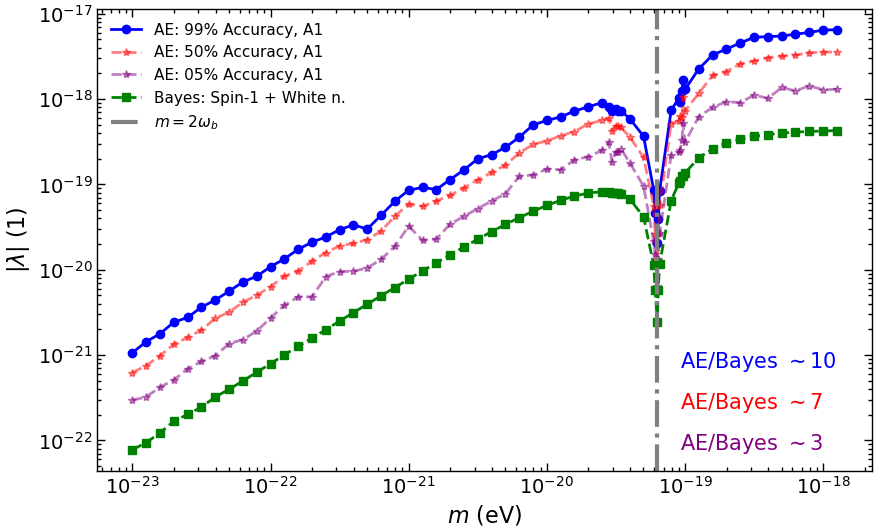

In [216]:
plt.figure(figsize=(10, 6))

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s1_array_099_A1, marker="o", linestyle='-', color='blue', label="AE: 99% Accuracy, A1")
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s1_array_05_A1, marker="*", linestyle='--', color='red', label="AE: 50% Accuracy, A1", alpha = 0.5)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s1_array_005_A1, marker="*", linestyle='--', color='purple', label="AE: 05% Accuracy, A1", alpha = 0.5)

# Plot simplistic Bayesian lines (spin 0, linear)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_bayes_sensitivity_s1, marker="s", linestyle='--', color='green', label="Bayes: Spin-1 + White n.")

# Add vertical line for angular orbital frequency
plt.axvline(x = 2 * omega_b_ev.value, color='grey', linestyle='-.', linewidth=3, label=r"$m = 2 \omega_b$")

# Logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add gridlines for better readability on log scale
#plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set axis labels with clear descriptions
plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$|\lambda|$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Customize the legend for better clarity
plt.legend(loc='upper left', fontsize=11)

plt.text(sorted_mass_list[-15], 9 * sorted_lamb_bayes_sensitivity_s1[0], r"AE/Bayes $\sim$" + str(median_099_s1_A1), fontsize=15, color="blue")
plt.text(sorted_mass_list[-15], 3 * sorted_lamb_bayes_sensitivity_s1[0], r"AE/Bayes $\sim$" + str(median_05_s1_A1), fontsize=15, color="red")
plt.text(sorted_mass_list[-15], sorted_lamb_bayes_sensitivity_s1[0], r"AE/Bayes $\sim$" + str(median_005_s1_A1), fontsize=15, color="purple") 

#plt.savefig("store/plots/autoencoder/sensitivity_spin1_Svarious.png")

plt.show()

## 10.4 Spin 2

In [170]:
import pickle

with open('store/files/autoencoder_experimental/evolution_spin2_ABC_run2.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

evolution_s2_A1 = loaded_data['evolution_s2_A1']
evolution_s2_B1 = loaded_data['evolution_s2_B1']
evolution_s2_C1 = loaded_data['evolution_s2_C1']

In [172]:
import pandas as pd
df = pd.read_csv('store/files/autoencoder_experimental/S99_spin2_ABC_run2.csv')

S_array_099_s2_A1 = df['S_array_099_s2_A1']
S_array_099_s2_B1 = df['S_array_099_s2_B1']
S_array_099_s2_C1 = df['S_array_099_s2_C1']

C:\Users\Pavel\AppData\Local\Temp\ipykernel_16752\3959845163.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


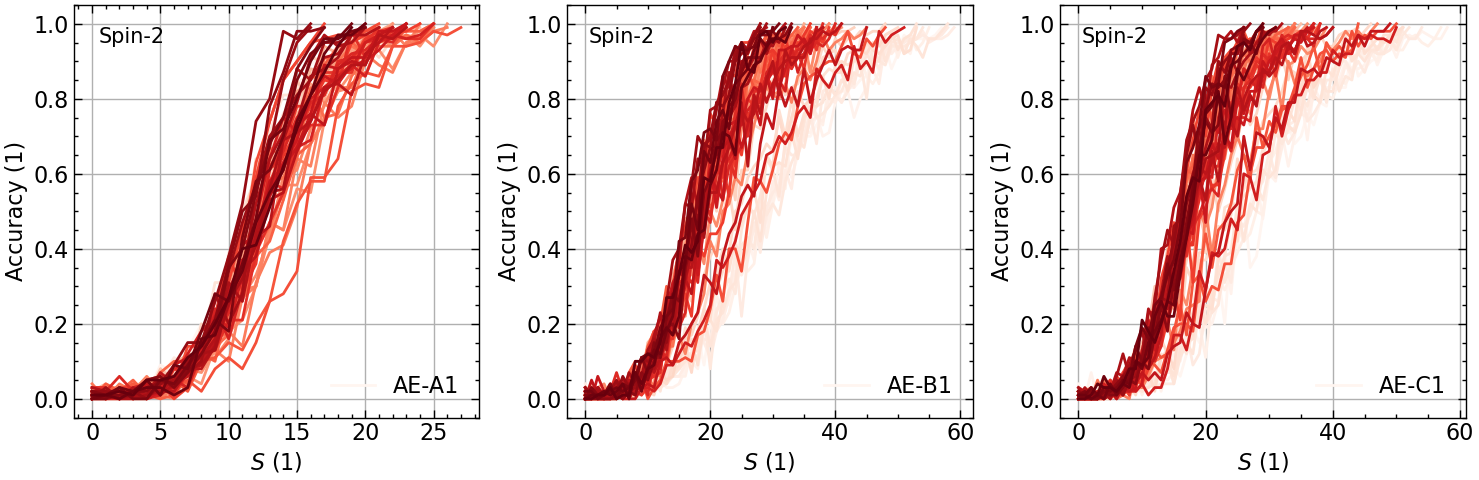

In [174]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # figsize adjusts overall figure size

# Create a colormap
cmap = cm.get_cmap('Reds')

# Plot the first figure
n_A1 = len(evolution_s2_A1)
for i, eval in enumerate(evolution_s2_A1):
    color = cmap(i / (n_A1 - 1))  # Normalize i to range [0, 1]
    label = "AE-A1" if i == 0 else None
    axs[0].plot(eval, "-", color=color, alpha=1, label=label)

# Plot the second figure
n_B1 = len(evolution_s2_B1)
for i, eval in enumerate(evolution_s2_B1):
    color = cmap(i / (n_B1 - 1))  # Normalize i to range [0, 1]
    label = "AE-B1" if i == 0 else None
    axs[1].plot(eval, "-", color=color, alpha=1, label=label)

# Plot the third figure
n_C1 = len(evolution_s2_C1)
for i, eval in enumerate(evolution_s2_C1):
    color = cmap(i / (n_C1 - 1))  # Normalize i to range [0, 1]
    label = "AE-C1" if i == 0 else None
    axs[2].plot(eval, "-", color=color, alpha=1, label=label)

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].text(0.5, 0.95, "Spin-2", fontsize=15, color="black")
axs[1].text(0.5, 0.95, "Spin-2", fontsize=15, color="black")
axs[2].text(0.5, 0.95, "Spin-2", fontsize=15, color="black")

axs[0].legend(loc = 'lower right')
axs[1].legend(loc = 'lower right')
axs[2].legend(loc = 'lower right')

axs[0].set_xlabel(r'$S$ (1)')
axs[0].set_ylabel('Accuracy (1)')
axs[1].set_xlabel(r'$S$ (1)')
axs[1].set_ylabel('Accuracy (1)')
axs[2].set_xlabel(r'$S$ (1)')
axs[2].set_ylabel('Accuracy (1)')

plt.tight_layout()
# plt.savefig("store/plots/autoencoder/Accuracy_vs_S_spin2.png")
plt.show()

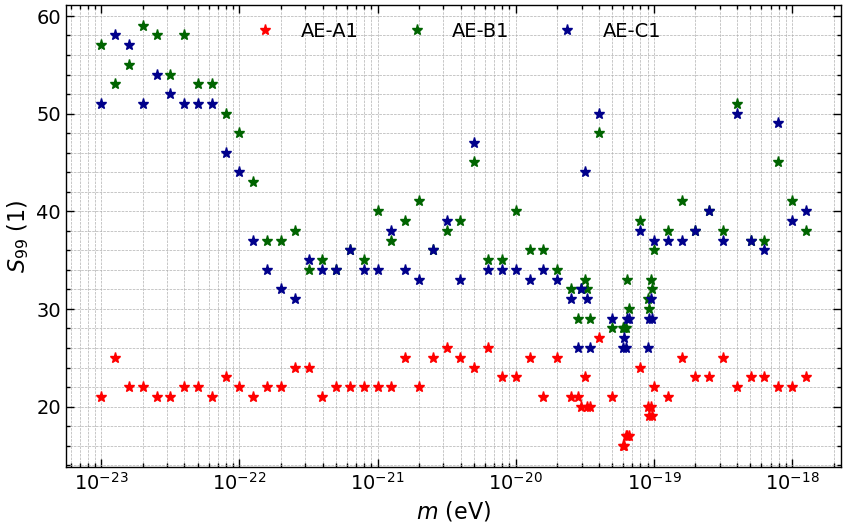

In [176]:
plt.figure(figsize=(10, 6))

plt.plot(masses_eV, S_array_099_s2_A1, "*", ms = 8, color = "red", label = "AE-A1")

plt.plot(masses_eV, S_array_099_s2_B1, "*", ms = 8, color = "darkgreen", label = "AE-B1")

plt.plot(masses_eV, S_array_099_s2_C1, "*", ms = 8, color = "darkblue", label = "AE-C1")

plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.xscale('log')

plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$S_{99}$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='upper center', fontsize=14, ncol = 3)

# plt.savefig("store/plots/autoencoder/S99_vs_m_ABC_autoencoder_spin2.png")

plt.show()

In [178]:
# compute the lambda value when mass, r, upsilon and SNR are given

def threshold_lambda_spin2(m, r, upsilon, chi, eps_s, eps_t, snr):

    m_val = m.to(u.eV).value
    omegb_ev_val =omega_b_ev.value
    k = m_val / omegb_ev_val
    psi =  np.array(psi_i(omega_b, Tasc, TOA_sim_array))

    q_vec = residuum_s2(1, m, r, upsilon, chi, eps_s, eps_t, omega_b_ev, psi, omega)
    q_len = np.sqrt( np.dot(q_vec,q_vec) )

    lamb = snr * noise.to(u.s) / q_len.to(u.s)

    return lamb

In [180]:
# a choice of DM phase and amplitude
upsasc_ex, chi_ex, eps_s_ex, eps_t_ex, r_ex = np.pi/3, np.pi/3, 1 / np.sqrt(2), 1 / np.sqrt(2), 1 / np.sqrt(2)

lamb_s2_array_099_A1 = []
for m, snr in zip(np.array(mass_list)*u.eV, S_array_099_s2_A1):
    lamb = np.array(threshold_lambda_spin2(m, r_ex, upsasc_ex, chi_ex, eps_s_ex, eps_t_ex, snr))
    lamb_s2_array_099_A1.append(lamb)
lamb_s2_array_099_A1 = np.array(lamb_s2_array_099_A1)

lamb_s2_array_099_B1 = []
for m, snr in zip(np.array(mass_list)*u.eV, S_array_099_s2_B1):
    lamb = np.array(threshold_lambda_spin2(m, r_ex, upsasc_ex, chi_ex, eps_s_ex, eps_t_ex, snr))
    lamb_s2_array_099_B1.append(lamb)
lamb_s2_array_099_B1 = np.array(lamb_s2_array_099_B1)

lamb_s2_array_099_C1 = []
for m, snr in zip(np.array(mass_list)*u.eV, S_array_099_s2_C1):
    lamb = np.array(threshold_lambda_spin2(m, r_ex, upsasc_ex, chi_ex, eps_s_ex, eps_t_ex, snr))
    lamb_s2_array_099_C1.append(lamb)
lamb_s2_array_099_C1 = np.array(lamb_s2_array_099_C1)

In [112]:
# simple Bayesian lines for a few mass points (same points as for the autoencoder)
lamb_bayes_sensitivity_s2 = np.array([lambda_s2(m, r_ex, upsasc_ex, chi_ex, eps_s_ex, eps_t_ex) for m in np.array(mass_list)*u.eV])

In [182]:
# REORDERING 
mass_array = np.array(mass_list)

# Get the sorted indices of the mass array
sorted_indices = np.argsort(mass_array)

# Sort mass_list and lamb_s1_array_099_X using the sorted indices
sorted_mass_list                  = mass_array[sorted_indices]
sorted_lamb_s2_array_099_A1      = lamb_s2_array_099_A1[sorted_indices]
sorted_lamb_s2_array_099_B1      = lamb_s2_array_099_B1[sorted_indices]
sorted_lamb_s2_array_099_C1      = lamb_s2_array_099_C1[sorted_indices]

sorted_lamb_bayes_sensitivity_s2 = lamb_bayes_sensitivity_s2[sorted_indices]

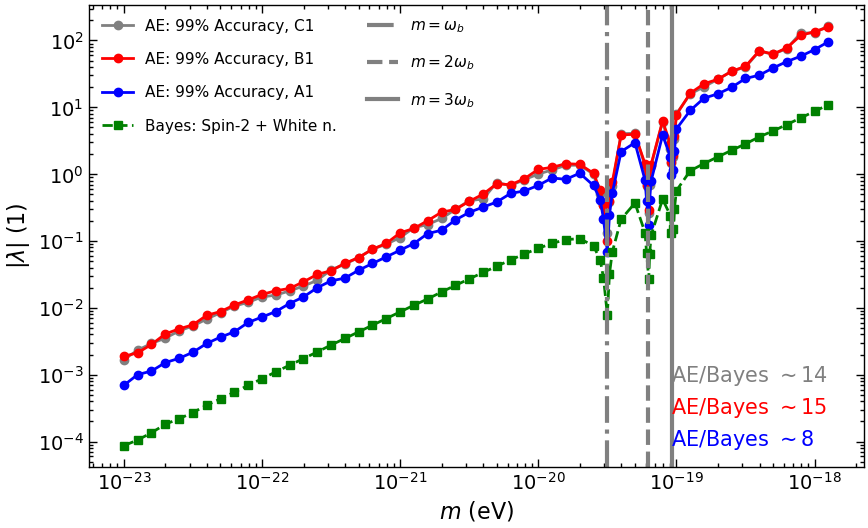

In [184]:
plt.figure(figsize=(10, 6))

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s2_array_099_C1, marker="o", linestyle='-', color='grey',  label="AE: 99% Accuracy, C1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s2_array_099_C2, marker="*", linestyle='-', color='black', label="AE: 99% Accuracy, C2")

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s2_array_099_B1, marker="o", linestyle='-',  color='red',     label="AE: 99% Accuracy, B1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s2_array_099_B2, marker="*", linestyle='--', color='darkred', label="AE: 99% Accuracy, B2", alpha = 0.5)

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s2_array_099_A1, marker="o", linestyle='-',  color='blue',     label="AE: 99% Accuracy, A1")
#plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s2_array_099_A2, marker="*", linestyle='--', color='darkblue', label="AE: 99% Accuracy, A2", alpha = 0.5)

# Plot simplistic Bayesian lines (spin 2, linear)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_bayes_sensitivity_s2, marker="s", linestyle='--', color='green', label="Bayes: Spin-2 + White n.")

# Add vertical line for angular orbital frequency
plt.axvline(x=1*omega_b_ev.value, color='grey', linestyle='-.', linewidth=3, label=r"$m = \omega_b$")
plt.axvline(x=2*omega_b_ev.value, color='grey', linestyle='--', linewidth=3, label=r"$m = 2\omega_b$")
plt.axvline(x=3*omega_b_ev.value, color='grey', linestyle='-',  linewidth=3, label=r"$m = 3\omega_b$")

# Logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add gridlines for better readability on log scale
#plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set axis labels with clear descriptions
plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$|\lambda|$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

median_099_s2_A1 = round(np.median(lamb_s2_array_099_A1 / sorted_lamb_bayes_sensitivity_s2))
median_099_s2_B1 = round(np.median(lamb_s2_array_099_B1 / sorted_lamb_bayes_sensitivity_s2))
median_099_s2_C1 = round(np.median(lamb_s2_array_099_C1 / sorted_lamb_bayes_sensitivity_s2))

#median_099_s2_A2 = round(np.median(lamb_s2_array_099_A2 / sorted_lamb_bayes_sensitivity_s2))
#median_099_s2_B2 = round(np.median(lamb_s2_array_099_B2 / sorted_lamb_bayes_sensitivity_s2))
#median_099_s2_C2 = round(np.median(lamb_s2_array_099_C2 / sorted_lamb_bayes_sensitivity_s2))

plt.text(sorted_mass_list[-15], 9 * sorted_lamb_bayes_sensitivity_s2[0], r"AE/Bayes $\sim$" + str(median_099_s2_C1), fontsize=15, color="grey")
plt.text(sorted_mass_list[-15], 3 * sorted_lamb_bayes_sensitivity_s2[0], r"AE/Bayes $\sim$" + str(median_099_s2_B1), fontsize=15, color="red")
plt.text(sorted_mass_list[-15], sorted_lamb_bayes_sensitivity_s2[0], r"AE/Bayes $\sim$" + str(median_099_s2_A1), fontsize=15, color="blue")

#plt.text(sorted_mass_list[-44], 9 * sorted_lamb_bayes_sensitivity_s2[0], r"AE/Bayes $\sim$" + str(median_099_s2_C2), fontsize=15, color="black")
#plt.text(sorted_mass_list[-44], 3 * sorted_lamb_bayes_sensitivity_s2[0], r"AE/Bayes $\sim$" + str(median_099_s2_B2), fontsize=15, color="darkred")
#plt.text(sorted_mass_list[-44], sorted_lamb_bayes_sensitivity_s2[0], r"AE/Bayes $\sim$" + str(median_099_s2_A2), fontsize=15, color="darkblue")

# Customize the legend for better clarity
plt.legend(loc='upper left', fontsize=11, ncol = 2, labelspacing=1.2)

#plt.savefig("store/plots/autoencoder/sensitivity_spin2.png")

plt.show()

In [186]:
# Find S_5
S_005_s2_A1 = []

for evol in evolution_s2_A1:
    helpful_array = np.array(evol)
    mask = helpful_array >= 0.05
    s_corresponding = sum(~mask)
    S_005_s2_A1.append(s_corresponding)

# Find lambda_5
lamb_s2_array_005_A1 = []
for m, snr in zip(np.array(mass_list) * u.eV, S_005_s2_A1):
    lamb = np.array(threshold_lambda_spin2(m, r_ex, upsasc_ex, chi_ex, eps_s_ex, eps_t_ex, snr))
    lamb_s2_array_005_A1.append(lamb)
lamb_s2_array_005_A1 = np.array(lamb_s2_array_005_A1)

sorted_lamb_s2_array_005_A1 = lamb_s2_array_005_A1[sorted_indices]

median_005_s2_A1 = round(np.median(sorted_lamb_s2_array_005_A1 / sorted_lamb_bayes_sensitivity_s2))
median_005_s2_A1

2

In [188]:
# Find S_5
S_05_s2_A1 = []

for evol in evolution_s2_A1:
    helpful_array = np.array(evol)
    mask = helpful_array >= 0.5
    s_corresponding = sum(~mask)
    S_05_s2_A1.append(s_corresponding)

# Find lambda_5
lamb_s2_array_05_A1 = []
for m, snr in zip(np.array(mass_list) * u.eV, S_05_s2_A1):
    lamb = np.array(threshold_lambda_spin2(m, r_ex, upsasc_ex, chi_ex, eps_s_ex, eps_t_ex, snr))
    lamb_s2_array_05_A1.append(lamb)
lamb_s2_array_05_A1 = np.array(lamb_s2_array_05_A1)

sorted_lamb_s2_array_05_A1 = lamb_s2_array_05_A1[sorted_indices]

median_05_s2_A1 = round(np.median(sorted_lamb_s2_array_05_A1 / sorted_lamb_bayes_sensitivity_s2))
median_05_s2_A1

5

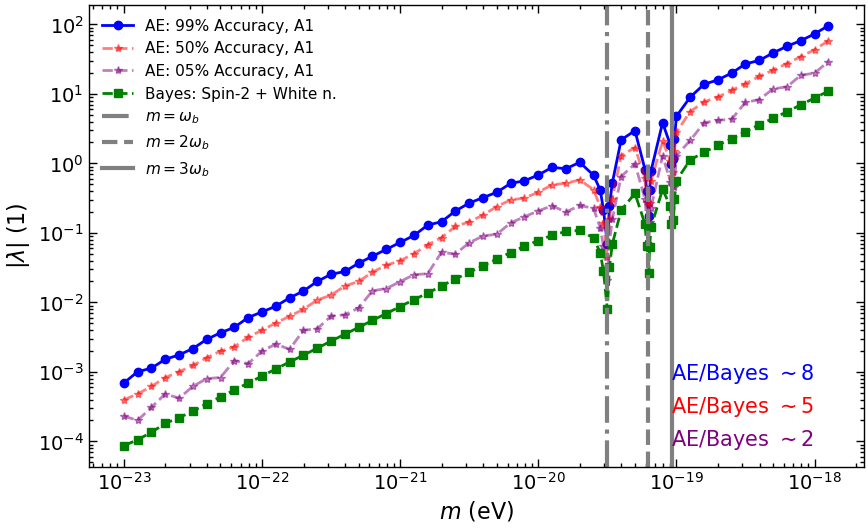

In [190]:
plt.figure(figsize=(10, 6))

# Plot autoencoder (99%)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s2_array_099_A1, marker="o", linestyle='-', color='blue', label="AE: 99% Accuracy, A1")
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s2_array_05_A1, marker="*", linestyle='--', color='red', label="AE: 50% Accuracy, A1", alpha = 0.5)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_s2_array_005_A1, marker="*", linestyle='--', color='purple', label="AE: 05% Accuracy, A1", alpha = 0.5)

# Plot simplistic Bayesian lines (spin 0, linear)
plt.plot(np.array(sorted_mass_list) * u.eV, sorted_lamb_bayes_sensitivity_s2, marker="s", linestyle='--', color='green', label="Bayes: Spin-2 + White n.")

# Add vertical line for angular orbital frequency
plt.axvline(x=1*omega_b_ev.value, color='grey', linestyle='-.', linewidth=3, label=r"$m = \omega_b$")
plt.axvline(x=2*omega_b_ev.value, color='grey', linestyle='--', linewidth=3, label=r"$m = 2\omega_b$")
plt.axvline(x=3*omega_b_ev.value, color='grey', linestyle='-',  linewidth=3, label=r"$m = 3\omega_b$")

# Logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add gridlines for better readability on log scale
#plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set axis labels with clear descriptions
plt.xlabel(r'$m$ (eV)', fontsize=16)
plt.ylabel(r'$|\lambda|$ (1)', fontsize=16)

# Set tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Customize the legend for better clarity
plt.legend(loc='upper left', fontsize=11)

plt.text(sorted_mass_list[-15], 9 * sorted_lamb_bayes_sensitivity_s2[0], r"AE/Bayes $\sim$" + str(median_099_s2_A1), fontsize=15, color="blue")
plt.text(sorted_mass_list[-15], 3 * sorted_lamb_bayes_sensitivity_s2[0], r"AE/Bayes $\sim$" + str(median_05_s2_A1), fontsize=15, color="red")
plt.text(sorted_mass_list[-15], sorted_lamb_bayes_sensitivity_s2[0], r"AE/Bayes $\sim$" + str(median_005_s2_A1), fontsize=15, color="purple") 

#plt.savefig("store/plots/autoencoder/sensitivity_spin2_Svarious.png")

plt.show()